In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
logreg = LogisticRegression(max_iter=10000)
scores = cross_val_score(logreg, X_scaled, y, cv=5)

In [5]:
print('cross-validation scores (5 folds): {}'.format(scores))
print('the average cross-validation score (5 folds): {:.2f}'.format(np.mean(scores)))

cross-validation scores (5 folds): [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
the average cross-validation score (5 folds): 0.98


In [6]:
from sklearn.model_selection import cross_validate
import pandas as pd

In [7]:
res = cross_validate(logreg, X_scaled, y, cv=5, return_train_score=True)
res_df = pd.DataFrame(res)
display(res_df)
print('mean time and score:\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.021099,0.001098,0.982456,0.991209
1,0.026270,0.002081,0.982456,0.989011
2,0.026967,0.001232,0.973684,0.989011
3,0.022373,0.001087,0.973684,0.991209
4,0.017875,0.001000,0.991150,0.986842


mean time and score:
 fit_time       0.022917
score_time     0.001300
test_score     0.980686
train_score    0.989456
dtype: float64


In [8]:
print('breast_cancer targets:\n{}'.format(y))

breast_cancer targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [9]:
from sklearn.model_selection import StratifiedKFold

In [10]:
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X, y)

3

In [11]:
bcl = LogisticRegression()
skf_scores = cross_val_score(bcl, X_scaled, y, cv=skf)

In [12]:
print('cross-validation scores (3 folds): {}'.format(skf_scores))
print('the average cross-validation score (3 folds): {:.2f}'.format(np.mean(skf_scores)))

cross-validation scores (3 folds): [0.97894737 0.97368421 0.97354497]
the average cross-validation score (3 folds): 0.98


In [13]:
from sklearn.model_selection import KFold

In [14]:
k_fold = KFold(n_splits=3)
print('accuracy value of cross-validation:\n{}'.format(cross_val_score(logreg, X_scaled, y, cv=k_fold)))

accuracy value of cross-validation:
[0.96315789 0.97894737 0.97354497]


In [15]:
fold_k = KFold(n_splits=3, shuffle=True, random_state=0)
print('accuracy value of cross-validation:\n{}'.format(cross_val_score(logreg, X_scaled, y, cv=fold_k)))

accuracy value of cross-validation:
[0.97894737 0.95789474 0.98941799]


In [16]:
from sklearn.model_selection import LeaveOneOut

In [17]:
loo = LeaveOneOut()
loo_scores = cross_val_score(logreg, X_scaled, y, cv=loo)

In [18]:
print('number of iterations: ', len(loo_scores))
print('the average cross validation score: {}'.format(np.mean(loo_scores)))

number of iterations:  569
the average cross validation score: 0.9789103690685413


In [19]:
from sklearn.model_selection import ShuffleSplit

In [20]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
shuffle_scores = cross_val_score(logreg, X_scaled, y, cv=shuffle_split)
print('accuracy values of shuffle-split cross-validation:\n{}'.format(shuffle_scores))
print('the average cross validation score: {:.2f}'.format(np.mean(shuffle_scores)))

accuracy values of shuffle-split cross-validation:
[0.97192982 0.97894737 0.96842105 0.95438596 0.9754386  0.97192982
 0.98596491 0.96491228 0.9754386  0.98245614]
the average cross validation score: 0.97


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
cancer_X = breast_cancer.data
cancer_y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, random_state=0)
print('train set shape: {}, test train shape: {}'.format(X_train.shape[0], X_test.shape[0]))

train set shape: 426, test train shape: 143


In [23]:
best_score = 0
for C in [0.001, 0.1, 1, 10]:
    for penalty in ['l1', 'l2']:
        logr = LogisticRegression(C=C, penalty=penalty, solver='saga', max_iter=10000)
        logr.fit(X_train, y_train)
        l_score = logr.score(X_test, y_test)
        print('C: ', C, 'penalty: ', penalty, 'accuracy: {:.3f}'.format(l_score))
        if l_score > best_score:
            best_score = l_score
            best_parameters = {'C': C, 'penalty': penalty}

print('the best accuracy value: {:.3f}'.format(best_score))
print('the best parameter values: {}'.format(best_parameters))

C:  0.001 penalty:  l1 accuracy: 0.916
C:  0.001 penalty:  l2 accuracy: 0.944
C:  0.1 penalty:  l1 accuracy: 0.944
C:  0.1 penalty:  l2 accuracy: 0.937
C:  1 penalty:  l1 accuracy: 0.937
C:  1 penalty:  l2 accuracy: 0.937
C:  10 penalty:  l1 accuracy: 0.937
C:  10 penalty:  l2 accuracy: 0.937
the best accuracy value: 0.944
the best parameter values: {'C': 0.001, 'penalty': 'l2'}


In [24]:
from sklearn.svm import SVC

best_svc = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        s_score = svm.score(X_test, y_test)

        if s_score > best_svc:
            best_svc = s_score
            best_svc_parameters = (gamma, C)

print('best SVM score: ', best_svc)
print('best parameters: ', best_svc_parameters)

best SVM score:  0.9300699300699301
best parameters:  (0.001, 1)


In [25]:
from sklearn.tree import DecisionTreeClassifier

best_dt = 0
for max_depth in [1, 2, 3, 5, 7, 9, 11]:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    dt.fit(X_train, y_train)
    d_score = dt.score(X_test, y_test)

    if d_score > best_dt:
        best_dt = d_score
        best_dt_param = max_depth

print('best dt score: ', best_dt)
print('best dt max_depth param: ', best_dt_param)

best dt score:  0.9370629370629371
best dt max_depth param:  2


In [26]:
from sklearn.model_selection import GridSearchCV

lr_grid = {'C': [0.001, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(LogisticRegression(solver='saga', max_iter=10000), lr_grid)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search_lr.fit(X_train, y_train)
score_gs = grid_search_lr.score(X_test, y_test)

print('test score:', score_gs)
print('best params: ', grid_search_lr.best_params_)
print('best score: ', grid_search_lr.best_score_)
print('whole args view :', grid_search_lr.best_estimator_)

results = pd.DataFrame(grid_search_lr.cv_results_)
display(results.head())

test score: 0.9440559440559441
best params:  {'C': 0.001, 'penalty': 'l2'}
best score:  0.9130506155950752
whole args view : LogisticRegression(C=0.001, max_iter=10000, solver='saga')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.750514,0.181653,0.001480,0.000567,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.965116,0.858824,0.894118,0.941176,0.905882,0.913023,0.037020,2
1,0.549225,0.045387,0.001230,0.000432,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.953488,0.870588,0.929412,0.894118,0.917647,0.913051,0.028585,1
2,1.128940,0.355068,0.002015,0.001532,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.953488,0.858824,0.929412,0.894118,0.917647,0.910698,0.032235,3
3,0.781279,0.138568,0.001314,0.000806,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,4
4,1.022332,0.346664,0.000946,0.000162,1,l1,"{'C': 1, 'penalty': 'l1'}",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,4


In [27]:
from sklearn.model_selection import GridSearchCV

grid1 = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gs1 = GridSearchCV(SVC(), grid1, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gs1.fit(X_train, y_train)
score1 = gs1.score(X_test, y_test)

print('test score:', score1)
print('best params: ', gs1.best_params_)
print('best score: ', gs1.best_score_)
print('whole args view :', gs1.best_estimator_)

results1 = pd.DataFrame(gs1.cv_results_)
display(results1.head())

test score: 0.9300699300699301
best params:  {'C': 1, 'gamma': 0.001}
best score:  0.9223803009575923
whole args view : SVC(C=1, gamma=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013819,0.001043,0.007405,0.001410,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
1,0.017138,0.003347,0.009939,0.003485,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
2,0.015696,0.001009,0.007900,0.001392,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
3,0.048059,0.027527,0.016774,0.006024,0.001,1,"{'C': 0.001, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
4,0.035337,0.012551,0.019150,0.005993,0.001,10,"{'C': 0.001, 'gamma': 10}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6


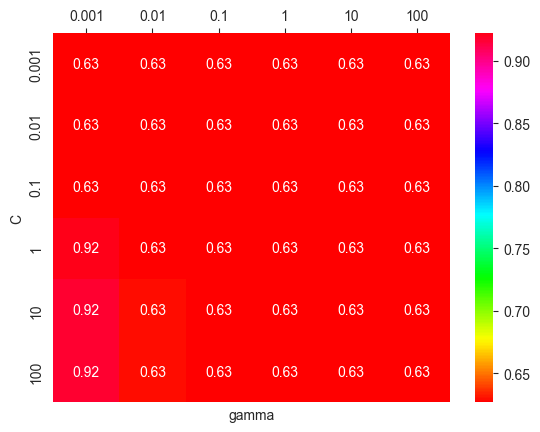

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sc = np.array(results1.mean_test_score).reshape(6, 6)
ax = sns.heatmap(sc, annot=True, xticklabels=grid1['gamma'], yticklabels=grid1['C'], cmap='hsv')
ax.set(xlabel='gamma', ylabel='C')
ax.xaxis.tick_top()

plt.show()

In [29]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)
print('train set shape: {}, validation set shape: {}, test set shape: {}'.format(X_train.shape[0], X_valid.shape[0],
                                                                                 X_test.shape[0]))

grid_lr = GridSearchCV(LogisticRegression(solver='saga', max_iter=10000), lr_grid)
grid_lr.fit(X_train, y_train)
validation_score = grid_lr.score(X_valid, y_valid)

print('best validation score: ', validation_score)
print('best params: ', grid_lr.best_params_)
print('best score: ', grid_lr.best_score_)

new_logreg = LogisticRegression(solver='saga', max_iter=10000, **grid_lr.best_params_)
new_logreg.fit(X_trainval, y_trainval)
test_score = new_logreg.score(X_test, y_test)

print('accuracy on test set with best params: ', test_score)

train set shape: 319, validation set shape: 107, test set shape: 143
best validation score:  0.8598130841121495
best params:  {'C': 0.1, 'penalty': 'l1'}
best score:  0.9436507936507936
accuracy on test set with best params:  0.9440559440559441


In [30]:
best_lr = 0
for C in [0.001, 0.1, 1, 10]:
    for penalty in ['l1', 'l2']:
        lr = LogisticRegression(solver='saga', max_iter=10000, C=C, penalty=penalty)
        scoress = cross_val_score(lr, X_trainval, y_trainval, cv=5)
        score = np.mean(scoress)

        if score > best_lr:
            best_lr = score
            best_params = {'C': C, 'penalty': penalty}

print('best logistic regression score: ', best_lr)
print('best params: ', best_params)

new_lr = LogisticRegression(solver='saga', max_iter=10000, **best_params).fit(X_trainval, y_trainval)
score_test = new_lr.score(X_test, y_test)
print('test accuracy: ', score_test)

best logistic regression score:  0.9130506155950752
best params:  {'C': 0.001, 'penalty': 'l2'}
test accuracy:  0.9440559440559441


In [31]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('best param values: {}'.format(grid_search.best_params_))
print('best cross-val accuracy value: {:.2f}'.format(grid_search.best_score_))

ress = pd.DataFrame(grid_search.cv_results_)
ress

best param values: {'C': 0.1, 'kernel': 'linear'}
best cross-val accuracy value: 0.96


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009201,0.001953,0.004675,8.184555e-04,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
1,0.008527,0.000674,0.004649,7.815133e-04,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
2,0.009416,0.001081,0.003764,4.278516e-04,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
3,0.015506,0.010074,0.006197,2.416492e-03,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
4,0.016586,0.006156,0.007132,2.768359e-03,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
5,0.012731,0.001130,0.006011,8.203884e-04,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
6,0.008128,0.000670,0.004207,6.279729e-04,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
7,0.010953,0.000531,0.005677,4.857623e-04,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
8,0.011834,0.000764,0.005634,7.785174e-04,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10
9,0.012800,0.002423,0.006972,7.954279e-04,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.625000,0.640625,0.640625,0.640625,0.634921,0.636359,0.006094,10


In [32]:
param_grid1 = [
    {'solver': ['saga'], 'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.2, 0.5, 0.8]},
    {'solver': ['saga'], 'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    {'solver': ['lbfgs'], 'C': [0.1, 1, 10], 'penalty': ['l2']}
]
grid_search1 = GridSearchCV(LogisticRegression(max_iter=10000), param_grid1, cv=5)
grid_search1.fit(X_trainval, y_trainval)

print('best param values: {}'.format(grid_search1.best_params_))
print('best cross-val accuracy value: {:.2f}'.format(grid_search1.best_score_))

ress1 = pd.DataFrame(grid_search1.cv_results_)
ress1

best param values: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
best cross-val accuracy value: 0.96


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.291901,0.242228,0.001276,0.000448,0.1,0.2,elasticnet,saga,"{'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasti...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
1,0.902377,0.086652,0.001070,0.000021,0.1,0.5,elasticnet,saga,"{'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasti...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
2,0.840726,0.057597,0.000648,0.000529,0.1,0.8,elasticnet,saga,"{'C': 0.1, 'l1_ratio': 0.8, 'penalty': 'elasti...",0.953488,0.858824,0.929412,0.894118,0.917647,0.910698,0.032235,4
3,0.828544,0.033000,0.000855,0.000429,1,0.2,elasticnet,saga,"{'C': 1, 'l1_ratio': 0.2, 'penalty': 'elasticn...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
4,0.892063,0.030651,0.000854,0.000428,1,0.5,elasticnet,saga,"{'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticn...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
5,0.795967,0.038280,0.000614,0.000502,1,0.8,elasticnet,saga,"{'C': 1, 'l1_ratio': 0.8, 'penalty': 'elasticn...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
6,0.921827,0.062979,0.001057,0.000659,10,0.2,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.2, 'penalty': 'elastic...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
7,1.390854,0.195512,0.001700,0.000495,10,0.5,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.5, 'penalty': 'elastic...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
8,0.975100,0.096301,0.001043,0.000652,10,0.8,elasticnet,saga,"{'C': 10, 'l1_ratio': 0.8, 'penalty': 'elastic...",0.953488,0.858824,0.917647,0.894118,0.917647,0.908345,0.031195,6
9,1.110006,0.234609,0.001266,0.001044,0.1,NaN,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.953488,0.858824,0.929412,0.894118,0.917647,0.910698,0.032235,4


In [33]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []

    for training_samples, test_samples in outer_cv.split(X, y):

        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []

            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters

        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [34]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

sco = nested_cv(breast_cancer.data, breast_cancer.target, StratifiedKFold(5), StratifiedKFold(5), SVC,
                ParameterGrid(param_grid))

print('cross validation accuracy values: {}'.format(sco))

cross validation accuracy values: [0.93859649 0.93859649 0.97368421 0.94736842 0.95575221]


In [35]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([212, 357], dtype=int64))


In [36]:
from sklearn.metrics import accuracy_score

logreg.fit(X, y)
y_pred = logreg.predict(X)
print('accuracy of the trained model is', round(accuracy_score(y, y_pred), 3))

accuracy of the trained model is 0.958


In [37]:
from sklearn.dummy import DummyClassifier

X_malignant = X[y == 0]
y_malignant = y[y == 0]
X_benign = X[y == 1]
y_benign = y[y == 1]
X_new = np.r_[X_benign, X_malignant[:50]]
y_new = np.r_[y_benign, y_malignant[:50]]
print(np.unique(y_new, return_counts=True))

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_new, y_new)
pred_dummy = dummy.predict(X_new)

print(np.unique(pred_dummy, return_counts=True))
print('accuracy of the dummy classifier is', round(accuracy_score(y_new, pred_dummy), 2))

(array([0, 1]), array([ 50, 357], dtype=int64))
(array([1]), array([407], dtype=int64))
accuracy of the dummy classifier is 0.88


In [38]:
from sklearn.metrics import confusion_matrix

matrix_c = confusion_matrix(y, y_pred)
print(matrix_c)
print('accuracy score of the model is', round(accuracy_score(y_pred, y), 2))

[[197  15]
 [  9 348]]
accuracy score of the model is 0.96


<Axes: >

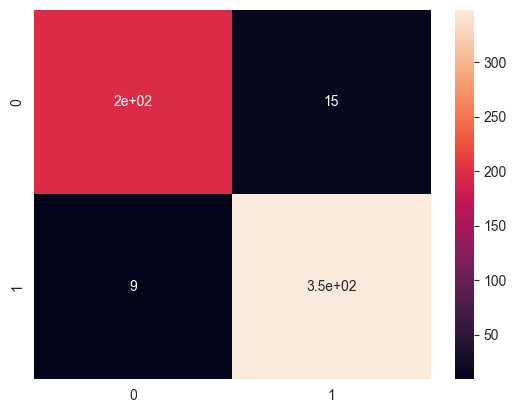

In [39]:
import seaborn as sns

sns.heatmap(matrix_c, annot=True)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       212
           1       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569
